## 5.2 VC Dimension

This exercise will let you explore the Vapnik-Chervonenkis dimension for logistic regression with polynomial features. We will test the shattering of datasets by fitting a classifier for every possible label combination. The samples will be arranged equally distant from each other on the unit circle.

**Task a)**
Implement fitting the [sklearn logistic regression classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) in the loop for every label combination. Find a suitable criterion to decide if a particular label set has been solved, so you can decide if $n$ points have been shattered.

**Q 5.2.1: You know from the lecture that linear models can shatter sets with 3 samples. Set the regularization penalty for logistic regression to 'l1' with C = 2 and n_samples = 3. What happens? Why?**

---

**Task b)**
Transform the dataset with polynomial features of degree 3 as in exercise 5.1. Make sure to put the regularization back to 'l2' if you answered the previous question.

**Q 5.2.2: The theoretical VC dimension for polynomial models of degree d with k input variables is $\begin{pmatrix} d + k \\ d \end{pmatrix}$. How many did you shatter? Why is it not the theoretical result?**


In [1]:
%%capture
%run '5.1 Bias-Variance Analysis.ipynb'
# We silently run your solution to the first exercise to have
# the previously defined functions and data available.

<Figure size 432x288 with 0 Axes>

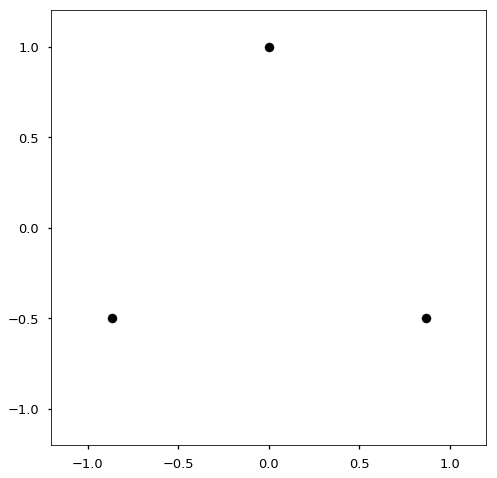

In [2]:
%matplotlib inline
import itertools

import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set_context('talk')
except ImportError: pass

# We set up some stuff for plotting the decision functions
plt.clf()
fig, ax = plt.subplots(figsize=(8, 8))
xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 100),
                                np.linspace(-1.2, 1.2, 100))
X_plot = np.c_[xx.ravel(), yy.ravel()]
def plot_decision(logistic_regression):
    if lr is None:
        return
    Z = logistic_regression.predict_proba(X_plot)
    levels = np.linspace(0.47, 0.53, 6)
    ax.contour(xx, yy, Z[:, 1].reshape(xx.shape),
               levels, cmap=plt.cm.coolwarm,
               alpha=0.8)

# The number of samples in our training dataset
# that determines the VC dimension.
n_samples = 3

# Create all samples on the unit circle
theta = np.linspace(0.5 * np.pi, 2.5 * np.pi, n_samples, endpoint=False)
X = np.vstack([np.cos(theta), np.sin(theta)]).T

# TODO(Task b): Add polynomial features to X_train and X_plot
X_train = X
X_plot = X_plot

# TODO(Task a)
shattered = None

# We loop over all possible target combinations to check if
# all datasets of size n_samples can be shattered
for i in itertools.product([-1, 1], repeat=n_samples):
    y = np.array(i)
    
    # We ignore the trivial label sets, where each sample belongs
    # to the same class
    if np.sum(y) in [-n_samples, n_samples]:
        continue
    
    # TODO(Task a): Fit a logistic regression classifier to the training set
    # Choose a low regularization penalty first, i.e. high C (e.g. 100)
    lr = None
    
    # Call the plotting function with the logistic regression classifier
    # It draws the decision boundary with a gradient from blue to red for the two classes.
    # If the computational load is to heavy, you can comment this out
    plot_decision(lr)

    # TODO(Task a): Implement a criterion to see if these labels were shattered
    shattered = None

ax.scatter(X[:, 0], X[:, 1], c='k')
ax.set_aspect('equal')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])

if shattered is not None:
    print('Unit circle dataset with {:d} samples {:s}shattered!'.format(n_samples, '' if shattered else 'not '))